In [1]:
import argparse
import pandas as pd
import numpy as np
from util import *
from sklearn.metrics import accuracy_score
from tabulate import tabulate


In [2]:
args = argparse.Namespace()

In [3]:
args.model = "LDA,QDA,RDA_0.5,RDA_0.25,RDA_0.75,KDE_1.0,KDE_2.0,MQD_0.01,MQD_0.5,MQD_0.99"
args.model = "MQD_0.01,MQD_0.5,MQD_0.99"
args.dataset = "breast_cancer_wisconsin_diagnostic,iris,wine,breast_cancer_wisconsin_original,ionosphere"


In [4]:
model_list = args.model.split(',')
dataset_list = args.dataset.split(',')

In [5]:
result = []
for dataset_name in dataset_list:
    dataset = get_dataset(dataset_name)
    dataset = format_dataset(dataset)
    X_train, X_test, y_train, y_test  = split_dataset(dataset)
    print(X_train.shape , X_test.shape, len(np.unique(y_train)))

    for model_name in model_list:
        model = build(model_name)
        model.fit(X_train,y_train)
        predict_y = model.predict(X_test)
        acc = accuracy_score(predict_y,y_test)
        result.append( (dataset_name, model_name , acc))


(381, 30) (188, 30) 2
cc-- 0.9861599183678766
a_modeified[index_i] -- 45740.061138225254
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
a_modeified[index_i] -- 0
cc-- 0.9976848479072052
a_modeified[index_i] -- 534.5491861148374
a_modeified[index_i] -- 0.01
a_modeified[index_i] -- 0.01
a_modeified[index_i] -- 0.01
a_mo

In [6]:
predict_y

array([1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 1], dtype=int64)

In [7]:
y_test

array([2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2], dtype=int64)

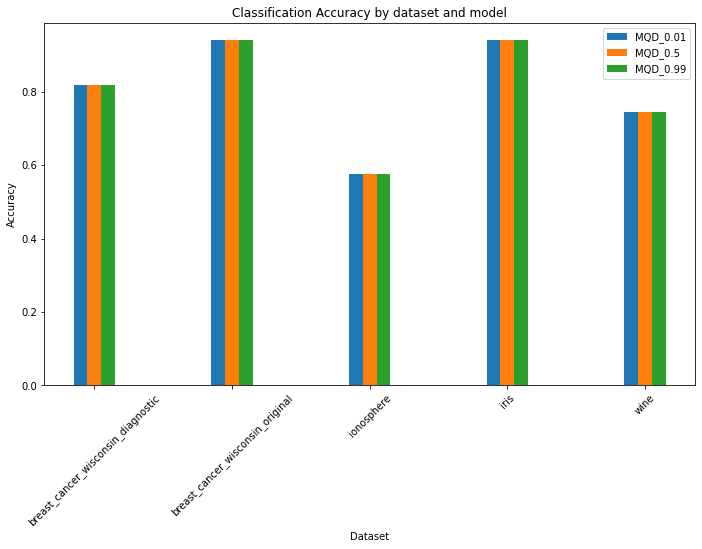

In [8]:
import matplotlib.pyplot as plt
import numpy as np



# 将数据按照 dataset_name 分类
data_dict = {}
for dataset_name, model_name, acc in result:
    if dataset_name not in data_dict:
        data_dict[dataset_name] = {}
    data_dict[dataset_name][model_name] = acc

# 获取唯一的 dataset_name 和 model_name
unique_datasets = np.unique([item[0] for item in result])
unique_models = np.unique([item[1] for item in result])

# 创建图
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(unique_datasets))
width = 0.1  # the width of the bars

for i, model in enumerate(unique_models):
    model_accs = [data_dict[dataset].get(model, 0) for dataset in unique_datasets]  # 如果模型不存在于某个数据集，则准确率为0
    ax.bar(x + i*width, model_accs, width, label=f'{model}')

ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_title('Classification Accuracy by dataset and model')
ax.set_xticks(x + width*(len(unique_models)/2 - 0.5))
ax.set_xticklabels(unique_datasets)
ax.legend()

fig.tight_layout()

plt.xticks(rotation=45)
plt.show()


In [9]:
# from collections import defaultdict
# # 分类数据
# data_dict = defaultdict(lambda: defaultdict(lambda: '-'))  # 使用 defaultdict 方便后续操作
# for dataset_name, model_name, acc in result:
#     method, *param = model_name.split('_')
#     param = param[0] if param else '-'
#     data_dict[dataset_name][method] = f'{acc:.2f}'
#     if param != '-':
#         data_dict[dataset_name][f'{method} parameter'] = param

# # 构建表头和表格数据
# header = ['Dataset']
# table_data = []
# # 
# # 找到所有唯一的方法和参数列
# methods_params = set()
# for dataset_methods in data_dict.values():
#     methods_params.update(dataset_methods.keys())
# methods_params = sorted(methods_params)  # 排序以保持一致的顺序

# header.extend(methods_params)

# for dataset_name, methods in data_dict.items():
#     row = [dataset_name]
#     row.extend([methods[method_param] for method_param in methods_params])
#     table_data.append(row)

# # 输出 LaTeX 代码
# latex_table = tabulate(table_data, headers=header, tablefmt='latex_booktabs')
# print(latex_table)

In [10]:
data_dict

{'breast_cancer_wisconsin_diagnostic': {'MQD_0.01': 0.8191489361702128,
  'MQD_0.5': 0.8191489361702128,
  'MQD_0.99': 0.8191489361702128},
 'iris': {'MQD_0.01': 0.94, 'MQD_0.5': 0.94, 'MQD_0.99': 0.94},
 'wine': {'MQD_0.01': 0.7457627118644068,
  'MQD_0.5': 0.7457627118644068,
  'MQD_0.99': 0.7457627118644068},
 'breast_cancer_wisconsin_original': {'MQD_0.01': 0.9393939393939394,
  'MQD_0.5': 0.9393939393939394,
  'MQD_0.99': 0.9393939393939394},
 'ionosphere': {'MQD_0.01': 0.5769230769230769,
  'MQD_0.5': 0.5769230769230769,
  'MQD_0.99': 0.5769230769230769}}

In [11]:
data_table =[ []*(len(model_list)+1) for i in range(len(dataset_list))]
data_table = []
for ii,i in enumerate(dataset_list ) :
    t = [i]
    for ij,j in enumerate(model_list):
        t.append( data_dict[i][j])
    data_table.append(t)
latex_table = tabulate(data_table, headers=['dataset']+model_list , tablefmt='latex_booktabs')
print(latex_table)

\begin{tabular}{lrrr}
\toprule
 dataset                            &   MQD\_0.01 &   MQD\_0.5 &   MQD\_0.99 \\
\midrule
 breast\_cancer\_wisconsin\_diagnostic &   0.819149 &  0.819149 &   0.819149 \\
 iris                               &   0.94     &  0.94     &   0.94     \\
 wine                               &   0.745763 &  0.745763 &   0.745763 \\
 breast\_cancer\_wisconsin\_original   &   0.939394 &  0.939394 &   0.939394 \\
 ionosphere                         &   0.576923 &  0.576923 &   0.576923 \\
\bottomrule
\end{tabular}


In [12]:
len(data_table)

5